In [67]:
import numpy as np
import pandas as pd
import sys

try:
    if path:
        raise Exception('changed')
except:
    path = True
    sys.path.append('../')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

data_path = Path("../data")
zoo = pd.read_csv(data_path.joinpath("zoo.csv"))
target = pd.read_csv(data_path.joinpath("zoo_target.csv"))

print(zoo.head())

ordinal_encoders = {}

animal_names = zoo["animal_name"].values
y = zoo["class_type"].values
target_decoder = {i: target for i, target in enumerate(target["Class_Type"].values, 1)}

for col in zoo.drop(["animal_name"], axis=1).columns:
    ordinal_encoders[col] = OrdinalEncoder()
    zoo[col] = ordinal_encoders[col].fit_transform(zoo[col].values.reshape(-1, 1)).squeeze() + 1

y = zoo["class_type"].values
X = zoo.drop(["animal_name", "class_type"], axis=1).values

n_clusters = len(np.unique(y))
m = np.array([len(np.unique(X[:, i])) for i in range(X.shape[1])])
print(m)
cols_under_5 = np.where(m < 6)[0]
X = X[:, cols_under_5]
m = m[cols_under_5]

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

In [105]:
print(f"Number of samples: {X.shape[0]}")
print(f"Number of clusters: {n_clusters}")
print(f"Number of features: {X.shape[1]}")

Number of samples: 101
Number of clusters: 7
Number of features: 15


In [106]:
from src.clustering import OrdinalClustering 

ordinal_clustering = OrdinalClustering(n_clusters=n_clusters, n_iter=100, silent=False)
clusters = ordinal_clustering.fit_transform(X, m)

Iteration 0
--------------------
Current mu: [[1 1 2 1 2 2 1 1 1 2 2 2 2 2 1]
 [2 2 2 2 2 1 2 2 2 2 2 1 2 1 1]
 [2 1 2 1 2 1 1 1 2 2 2 2 1 2 2]
 [1 2 1 2 1 1 1 2 2 2 1 2 2 1 2]
 [1 2 2 2 1 1 1 2 2 2 2 1 1 2 2]
 [2 1 1 2 2 2 2 2 1 1 2 2 2 2 2]
 [2 1 1 1 2 1 2 2 1 1 1 1 1 2 2]]
Current pi: [[0.1617662  0.93260001 0.12649939 0.55690618 0.4314266  0.14088047
  0.61131157 0.62963207 0.02788888 0.22524281 0.48273747 0.90080942
  0.91979448 0.97633184 0.49197341]
 [0.56137217 0.13561831 0.61557385 0.42264854 0.98612774 0.8160812
  0.80363118 0.26851498 0.89544155 0.59385226 0.37283521 0.86651553
  0.02972086 0.7591527  0.22607584]
 [0.8980443  0.21237801 0.58739466 0.11653754 0.21710595 0.15143355
  0.06906753 0.73093101 0.89457225 0.60618454 0.88435405 0.04750642
  0.26153835 0.21176501 0.36086412]
 [0.03558903 0.37963812 0.52563359 0.2620752  0.41030804 0.04904441
  0.25237197 0.13489563 0.59680353 0.7060651  0.75836254 0.57829476
  0.62106504 0.15860719 0.44050121]
 [0.72826064 0.68057746 

In [107]:
print(f"Estimated alpha: {ordinal_clustering.alpha}")
print(f"Estimated mu: {ordinal_clustering.mu}")
print(f"Estimated pi: {ordinal_clustering.pi}")

Estimated alpha: [0.12871285 0.20792061 0.0987501  0.05963074 0.09928389 0.05939172
 0.34631009]
Estimated mu: [[1 1 2 1 1 2 2 2 2 1 1 2 2 1 1]
 [1 2 2 1 2 1 1 1 2 2 1 1 2 1 1]
 [1 1 2 1 2 1 1 1 1 2 1 1 1 1 1]
 [2 1 1 2 1 2 2 2 2 2 1 2 2 1 2]
 [1 1 2 1 1 2 2 1 1 1 1 1 1 1 1]
 [1 1 2 1 1 1 2 2 2 2 2 1 2 1 1]
 [2 1 1 2 1 1 1 2 2 2 1 1 2 1 2]]
Estimated pi: [[0.99999986 0.99999967 0.99998924 0.99999993 0.99999957 0.99999926
  0.3538249  0.99999928 0.99999811 0.99999276 0.84610109 0.99998678
  0.9999982  0.8461389  0.38594696]
 [0.99999915 0.90485884 0.99999903 0.99999564 0.52502727 0.42891613
  0.12030301 0.99998462 0.99999926 0.99999998 0.99993822 0.99999999
  0.99999959 0.71418997 0.33785034]
 [0.19468594 0.9999996  0.99999887 0.99999994 0.20267085 0.99999928
  0.7993767  0.99999984 0.99999954 0.99994274 0.59888814 0.99941125
  0.99999877 0.79948118 0.99999783]
 [0.15265325 0.99993006 0.65299519 0.99773158 0.99999941 0.98682577
  0.99973507 0.67046063 0.99999997 0.99999349 0.99998986 0.

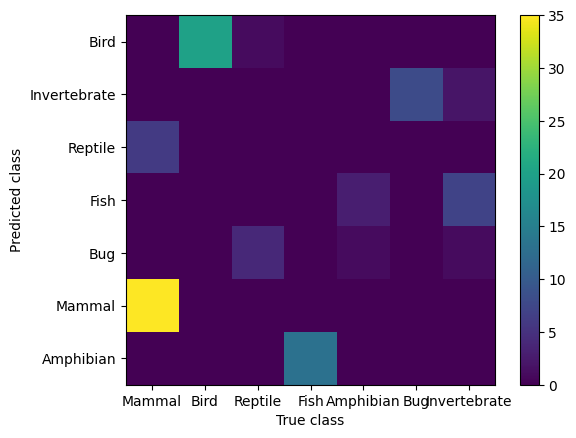

0.8213100047664541


0.9801980198019802

In [130]:
import matplotlib.pyplot as plt

def plot_assignment_matrix(pred_clusters, y, n_clusters, pred_labels=None, true_labels=None):
    if pred_labels is None:
        pred_labels = {i: i for i in range(1, 1 + n_clusters)}
    if true_labels is None:
        true_labels = {i: i for i in range(1, 1 + n_clusters)}

    clusters_histograms = np.zeros((n_clusters, n_clusters))
    for pred, true in zip(pred_clusters, y):
        clusters_histograms[int(pred) - 1, int(true) -1] += 1

    plt.imshow(clusters_histograms)
    plt.yticks(np.arange(n_clusters), [pred_labels[i] for i in range(1, 1+ n_clusters)])
    plt.xticks(np.arange(n_clusters), [true_labels[i] for i in range(1, 1+ n_clusters)])
    plt.xlabel("True class")
    plt.ylabel("Predicted class")
    plt.colorbar()
    plt.show()

# Since the histograms are just 1D, ot is equivalent to sorting the clusters
hist_pred = np.sum(clusters == np.arange(1, 1 + n_clusters).reshape(-1, 1), axis=1)
hist_true = np.sum(y == np.arange(1, 1 + n_clusters).reshape(-1, 1), axis=1)

hist_pred_sorted = np.argsort(hist_pred)
hist_true_sorted = np.argsort(hist_true)

pred_labels = {hist_pred_sorted[i] + 1: target_decoder[hist_true_sorted[i] + 1] for i in range(n_clusters)}

# With optimal transport
pred_clusters = clusters

clusters_histograms = np.zeros((n_clusters, n_clusters))
for pred, true in zip(pred_clusters, y):
    clusters_histograms[int(pred) - 1, int(true) -1] += 1

plot_assignment_matrix(clusters, y, n_clusters, pred_labels=pred_labels, true_labels=target_decoder)

# # apply optimal transport to sort the clusters using the assignment matrix
# import ot

# a = np.ones(n_clusters)
# b = np.ones(n_clusters)

# G = ot.emd(a, b, clusters_histograms.max() - clusters_histograms)
# print(G)

# row_max = np.argmax(G, axis=0)
# col_max = np.argmax(G, axis=1)

# pred_labels = {i + 1: target_decoder[row_max[i] + 1] for i in range(n_clusters)}

# plot_assignment_matrix(clusters, y, n_clusters, pred_labels=pred_labels, true_labels=target_decoder)

from sklearn.metrics import adjusted_rand_score
print(adjusted_rand_score(clusters, y))

from scipy.stats import wasserstein_distance
wasserstein_distance(clusters, y)

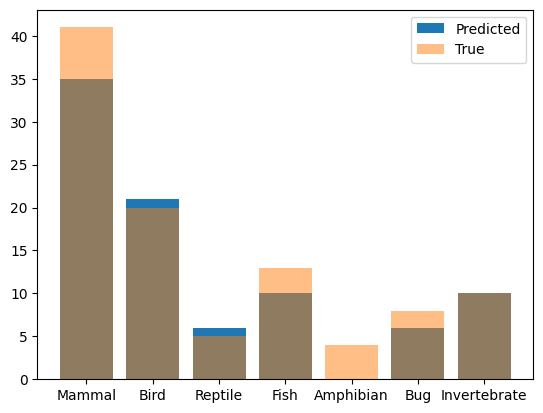

In [131]:
import matplotlib.pyplot as plt

hist_pred_ordered = np.zeros(n_clusters)
pred_labels_inv = {v: k for k, v in pred_labels.items()}

for k, v in target_decoder.items():
    hist_pred_ordered[k-1] = hist_pred[pred_labels_inv[v]-1]

#Visualize the predicted clusters cross distribution with the true labels
plt.bar(np.arange(n_clusters), hist_pred_ordered)
plt.bar(np.arange(n_clusters), hist_true, alpha=0.5)
plt.xticks(np.arange(n_clusters), [target_decoder[i+1] for i in range(n_clusters)])
plt.legend(["Predicted", "True"])
plt.show()

Note that sorting the historgrams is not necessarily the best way to assign the labels for the newly clustered data. This is because sometimes, two wrongly assigned observations can flip the order of the histograms and lead to a bad label assignment.